In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("http://www.math.univ-toulouse.fr/~xgendre/ens/data/VillesDistancesIGN", sep=" ")

In [ ]:
GPS = pd.read_csv( "http://www.math.univ-toulouse.fr/~xgendre/ens/data/VillesGPS", sep = " ",header =  None)

In [ ]:
GPS.head()
#Coordonnées inutilisable en l'état, besoin de les convertir

,0,1,2,3,4
0,Amiens,49,54,2,18
1,Andorre,42,30,1,31
2,Angers,47,28,0,-33
3,Bâle,47,34,7,34
4,LaBaule,47,17,-2,-23


In [ ]:
#Conversion des coordonnées
latitude = GPS[1] + (GPS[2]/60)
type(latitude)

pandas.core.series.Series

In [ ]:
longitude = GPS[3] + (GPS[4]/60)
type(longitude)

pandas.core.series.Series

In [ ]:
GPS["latitude"] = list(latitude)

In [ ]:
GPS["longitude"] = list(longitude)

In [ ]:
GPS.head()

,0,1,2,3,4,latitude,longitude
0,Amiens,49,54,2,18,49.900000,2.300000
1,Andorre,42,30,1,31,42.500000,1.516667
2,Angers,47,28,0,-33,47.466667,-0.550000
3,Bâle,47,34,7,34,47.566667,7.566667
4,LaBaule,47,17,-2,-23,47.283333,-2.383333


In [ ]:
# On récupère la liste des villes présente dans ce dataset
Villes_GPS = list(GPS[0])

In [ ]:
Villes_GPS

In [ ]:
GPS = GPS.set_index(0)

In [ ]:
GPS.head()

,1,2,3,4,latitude,longitude
0,,,,,,
Amiens,49,54,2,18,49.900000,2.300000
Andorre,42,30,1,31,42.500000,1.516667
Angers,47,28,0,-33,47.466667,-0.550000
Bâle,47,34,7,34,47.566667,7.566667
LaBaule,47,17,-2,-23,47.283333,-2.383333


In [ ]:
data.head(15)

,ville,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47
0,amie,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ando,1020,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ange,440,760.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bale,560,1130.0,770.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,laba,590,830.0,160.0,940.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,besa,560,970.0,620.0,160.0,770.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,bord,730,430.0,340.0,840.0,400.0,700.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,boul,120,1020.0,480.0,690.0,550.0,610.0,830.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,bour,380,680.0,260.0,500.0,430.0,350.0,400.0,480.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,bres,610,1130.0,380.0,1090.0,270.0,960.0,620.0,690.0,630.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#On remplace les valeur manquante par 0 pour des besoins de calcul et on transforme le tout en matrice que l'on assigne a une variable
A = data.fillna(0).drop("ville", axis=1).values

In [ ]:
# Addition de la matrice et sa transposé pour avoir une cission de toutes les distances
B = A + A.T

In [ ]:
# On récupère la liste des villes présente dans notre dataset
Villes = list(data['ville'])

In [ ]:
Villes

['amie',
 'ando',
 'ange',
 'bale',
 'laba',
 'besa',
 'bord',
 'boul',
 'bour',
 'bres',
 'brux',
 'caen',
 'cala',
 'cham',
 'cher',
 'clem',
 'dijo',
 'gene',
 'gren',
 'leha',
 'hend',
 'lill',
 'limo',
 'lour',
 'luxe',
 'lyon',
 'lema',
 'mars',
 'metz',
 'mont',
 'mulh',
 'nanc',
 'nant',
 'nice',
 'orle',
 'pari',
 'perp',
 'poit',
 'reim',
 'renn',
 'roue',
 'roya',
 'stma',
 'stra',
 'toul',
 'tour',
 'troy']

In [ ]:
#On crée notre nouveau jeu de donnée avec les listes des villes et leur distance
new_data = pd.DataFrame(B, columns = Villes_GPS, index = Villes_GPS)

In [ ]:
new_data.head()

,Amiens,Andorre,Angers,Bâle,LaBaule,Besançon,Bordeaux,Boulogne,Bourges,Brest,...,Poitiers,Reims,Rennes,Rouen,Royan,StMalo,Strasbourg,Toulouse,Tours,Troyes
Amiens,0.0,1020.0,440.0,560.0,590.0,560.0,730.0,120.0,380.0,610.0,...,480.0,160.0,410.0,110.0,650.0,400.0,500.0,850.0,380.0,280.0
Andorre,1020.0,0.0,760.0,1130.0,830.0,970.0,430.0,1020.0,680.0,1130.0,...,610.0,1020.0,850.0,980.0,550.0,920.0,1110.0,190.0,700.0,910.0
Angers,440.0,760.0,0.0,770.0,160.0,620.0,340.0,480.0,260.0,380.0,...,140.0,430.0,120.0,290.0,300.0,200.0,780.0,570.0,110.0,430.0
Bâle,560.0,1130.0,770.0,0.0,940.0,160.0,840.0,690.0,500.0,1090.0,...,690.0,410.0,840.0,690.0,890.0,900.0,150.0,930.0,670.0,330.0
LaBaule,590.0,830.0,160.0,940.0,0.0,770.0,400.0,550.0,430.0,270.0,...,260.0,600.0,160.0,450.0,290.0,190.0,940.0,620.0,270.0,600.0


In [ ]:
new_data.columns

Index(['Amiens', 'Andorre', 'Angers', 'Bâle', 'LaBaule', 'Besançon',
       'Bordeaux', 'Boulogne', 'Bourges', 'Brest', 'Bruxelles', 'Caen',
       'Calais', 'Chamonix', 'Cherbourg', 'Clermont', 'Dijon', 'Genève',
       'Grenoble', 'LeHavre', 'Hendaye', 'Lille', 'Limoges', 'Lourdes',
       'Luxembourg', 'Lyon', 'LeMans', 'Marseille', 'Metz', 'Montpellier',
       'Mulhouse', 'Nancy', 'Nantes', 'Nice', 'Orléans', 'Paris', 'Perpignan',
       'Poitiers', 'Reims', 'Rennes', 'Rouen', 'Royan', 'StMalo', 'Strasbourg',
       'Toulouse', 'Tours', 'Troyes'],
      dtype='object')

In [ ]:
#distance paris - lyon en KM
new_data.loc['Paris','Lyon']

460.0

In [ ]:
new_data['Paris']

Amiens         150.0
Andorre        880.0
Angers         290.0
Bâle           560.0
LaBaule        480.0
Besançon       410.0
Bordeaux       580.0
Boulogne       240.0
Bourges        240.0
Brest          600.0
Bruxelles      310.0
Caen           240.0
Calais         290.0
Chamonix       620.0
Cherbourg      360.0
Clermont       390.0
Dijon          310.0
Genève         540.0
Grenoble       570.0
LeHavre        200.0
Hendaye        800.0
Lille          220.0
Limoges        400.0
Lourdes        830.0
Luxembourg     380.0
Lyon           460.0
LeMans         200.0
Marseille      780.0
Metz           330.0
Montpellier    760.0
Mulhouse       540.0
Nancy          300.0
Nantes         380.0
Nice           930.0
Orléans        130.0
Paris            0.0
Perpignan      910.0
Poitiers       330.0
Reims          140.0
Rennes         350.0
Rouen          140.0
Royan          500.0
StMalo         420.0
Strasbourg     490.0
Toulouse       700.0
Tours          230.0
Troyes         160.0
Name: Paris, 

In [ ]:
X = new_data.iloc[:, :].values

In [ ]:
from sklearn.cluster import KMeans

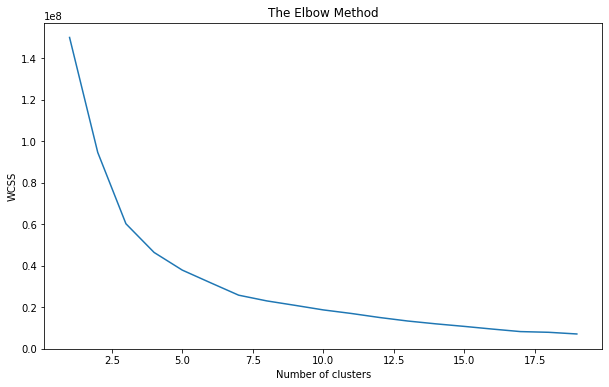

In [ ]:
#Choix du nombre de cluster
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### On choisit 7 clusters

In [ ]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
kmeans.cluster_centers_.shape

(7, 47)

No handles with labels found to put in legend.


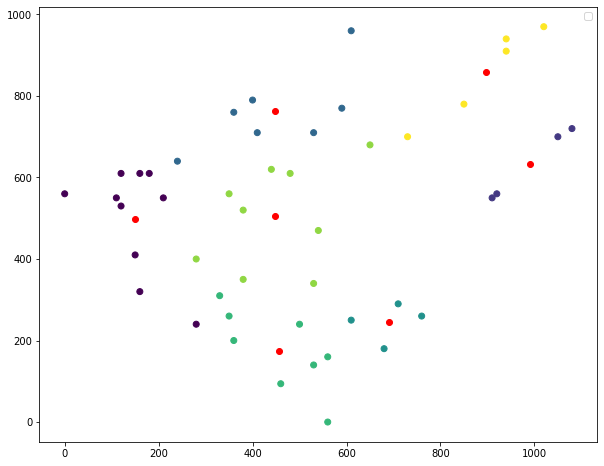

In [ ]:
# Visualisation des cluster
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,5], c= y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,5], c='r')
plt.legend()

In [ ]:
#Fonction cout,Distance totale entre les centres de cluster et tous les autres points
kmeans.inertia_

25740002.23888889

### Visualisation

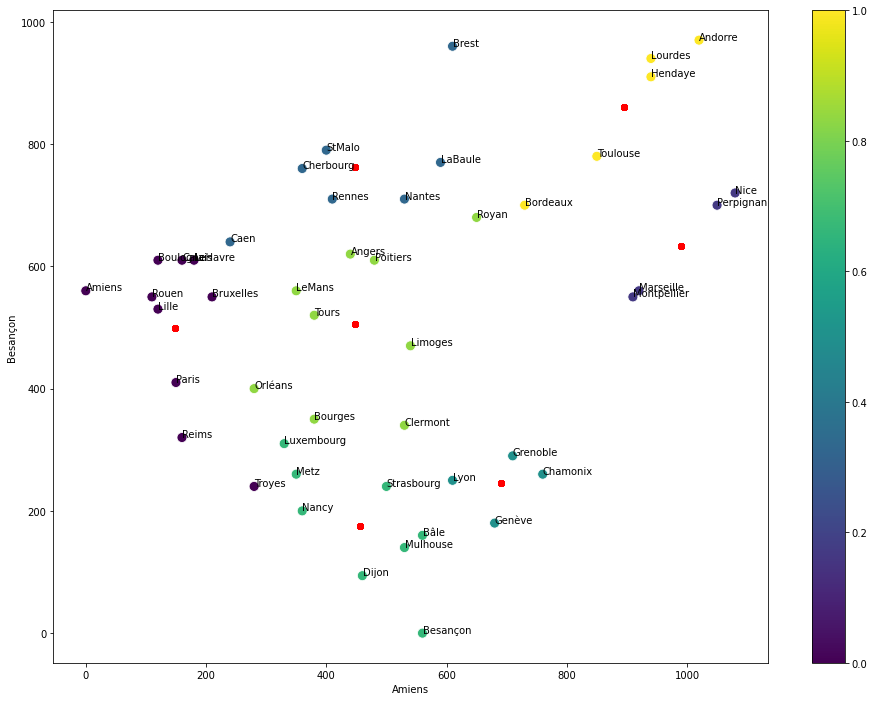

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(x=new_data['Amiens'],y=new_data['Besançon'], c=y_kmeans, s=100)
for i in range(new_data.shape[0]):
 plt.text(x=new_data.Amiens[i]+0.3,y=new_data.Besançon[i]+0.3,s=new_data.index[i], 
          horizontalalignment='left', size='medium',
          color='black')
 plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,5], c='r')
plt.colorbar()



```
# Ce texte est au format code
```

## Représentation des Cluster sur une carte

In [ ]:
import folium

In [ ]:
location = [[i,j] for i,j in (GPS[['latitude','longitude']]).items()]

In [ ]:
len(y_kmeans)

47

In [ ]:
GPS["cluster"] = y_kmeans

In [ ]:
GPS["Villes"] = list(Villes_GPS)

In [ ]:
GPS.head()

,1,2,3,4,latitude,longitude,cluster,Villes
0,,,,,,,,
Amiens,49,54,2,18,49.900000,2.300000,0,Amiens
Andorre,42,30,1,31,42.500000,1.516667,6,Andorre
Angers,47,28,0,-33,47.466667,-0.550000,5,Angers
Bâle,47,34,7,34,47.566667,7.566667,4,Bâle
LaBaule,47,17,-2,-23,47.283333,-2.383333,2,LaBaule


In [ ]:
colors = {0 : 'red', 1 : 'blue', 2 : 'green', 3 : 'black', 4 : 'orange', 5 : 'white', 6 : 'yellow'}

m = folium.Map(location = [47.901402, 1.903920], zoom_start= 6.4)

GPS.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], 
                                              radius=10, fill_color=colors[row['cluster']], popup=row['Villes'])
                                             .add_to(m), axis=1)
m

 ### Bonus

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)

In [ ]:
X_reduced = pca.fit_transform(X)

In [ ]:
# Training the K-Means model on the dataset
kmeans2 = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans2.fit_predict(X_reduced)

In [ ]:
kmeans2.cluster_centers_.shape

(7, 2)

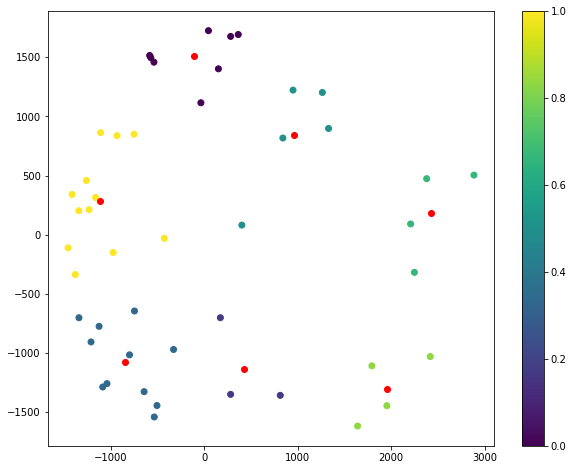

In [ ]:
# Visualisation des cluster
plt.figure(figsize=(10,8))
plt.scatter(X_reduced[:,0],X_reduced[:,1], c= y_kmeans2)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='r')
plt.colorbar()

In [ ]:
data_pca_df = pd.DataFrame({
    "Dim1" : X_reduced[:,0], 
    "Dim2" : X_reduced[:,1],
    "Country" : new_data.index})

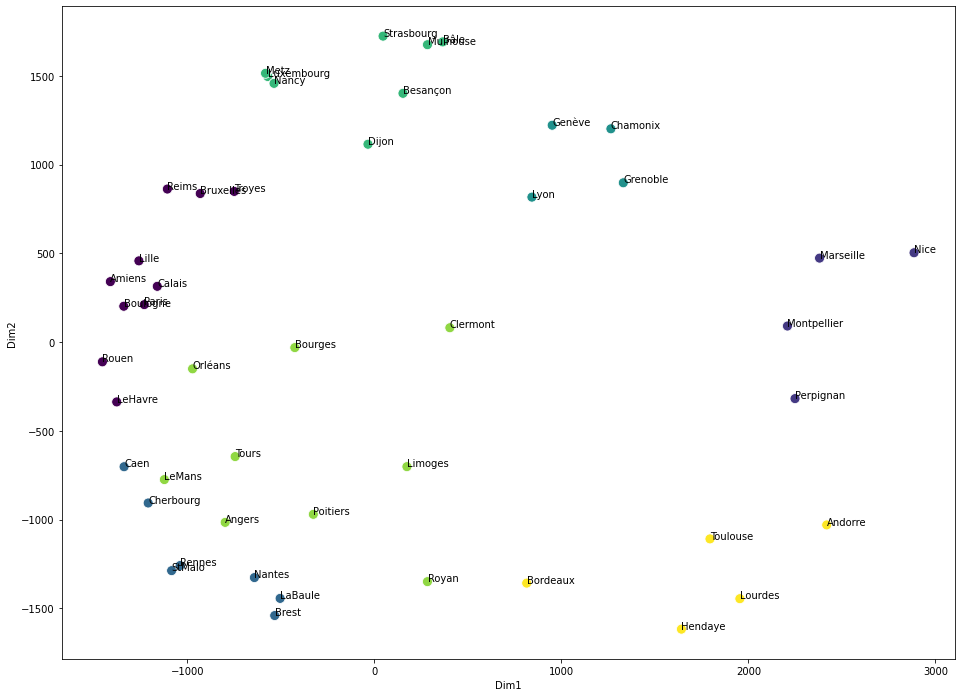

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(x=data_pca_df['Dim1'],y=data_pca_df['Dim2'], c=y_kmeans ,  s=100)
for i in range(data_pca_df.shape[0]):
 plt.text(x=data_pca_df.Dim1[i]+0.3,y=data_pca_df.Dim2[i]+0.3,s=data_pca_df.Country[i], 
          horizontalalignment='left', size='medium',
          color='black' )
 #, weight='semibold'
 
